<h1 style='text-align:center'> ML Model For Predicting Customer Churn For Gym Chain.</h1>

#### Project description<br>
> In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.<br>
Learn to predict the probability of churn (for the upcoming month) for each customer<br>
Draw up typical user portraits: select the most outstanding groups and describe their main features<br>
Analyze the factors that impact churn most<br>
Draw basic conclusions and develop recommendations on how to improve customer service:<br>
- Identify target groups<br>
- Suggest measures to cut churn<br>
- Describe any other patterns you see with respect to interaction with customers<br>

#### Description of the data
User data for the preceding month
- 'gender'
- 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
- 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- 'Promo_friends' — whether the user originally signed up through a "bring a friend" offer
- 'Phone' — whether the user provided their phone number
- 'Age'
- 'Lifetime' — the time (in months) since the customer first came to the gym
- 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
- 'Month_to_end_contract' — the months remaining until the contract expires
- 'Group_visits' — whether the user takes part in group sessions
- 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
- 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
- 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.<br>

#### Table of Contents
#### Step 1.
- [Download the data](#Open)

#### Step 2. Carry out exploratory data analysis (EDA)
- [Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method)](#Study-the-dataset)
- [Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method)](#Mean-feature-values)
- [Plot bar histograms and feature distributions for those who left (churn) and those who stayed](#Plot-bar-histograms)
- [Build a correlation matrix and display it](#Correlation-matrix)

#### Step 3. Build a model to predict user churn
- [Build a binary classification model for customers where the target feature is the user's leaving next month.
Divide the data into train and validation sets using the train_test_split() function](#Divide-the-data)
- [Train the model on the train set with two methods: logistic regression and random forest](#Two-methods)
- [Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?](#Metrics)

#### Step 4. Create user clusters
- [Set aside the column with data on churn and identify object (user) clusters. Standardize the data](#Standardize-the-data)
- [Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Use the resulting graph to estimate the number of clusters you can single out](#Build-a-matrix-of-distances)
- [Train the clustering model with the K-means algorithm and predict customer clusters (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students)](#K-means-algorithm)
- [Look at the mean feature values for clusters. Does anything catch your eye?](#Mean-feature-values2)
- [Plot distributions of features for the clusters. Do you notice anything?](#Distributions-of-features)
- [Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?](#Churn-rate-for-each-cluster)

#### Step 5. Come up with conclusions and basic recommendations on working with customers
- [Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention](#Conclusion)

<a id='Open'></a>

#### "Download the data"

In [8]:
# importing all needed libraries
import pandas as pd
import scipy.stats as st
import datetime as dt
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, silhouette_score
from sklearn.metrics import silhouette_samples, balanced_accuracy_score

In [9]:
# reading file
df = pd.read_csv('gym_churn_us.csv')

<a id='Study-the-dataset'></a>

#### "Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method"

In [10]:
# checking the our data' info 
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

We don't have missing values, and data types looks right. Let's look at the data.

In [11]:
# converting all column names to lowercase
df.columns = [x.lower() for x in df.columns.to_list()]

In [12]:
# general data overview
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [13]:
df.sample(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
320,0,1,0,0,1,6,1,35,44.286882,6.0,1,0.499383,0.598532,0
2400,0,1,0,0,0,6,0,29,70.895575,6.0,15,1.710436,1.689398,0
3939,0,1,0,0,0,1,0,27,13.091704,1.0,1,2.239541,1.399946,1
1564,1,1,1,0,1,1,1,29,32.922315,1.0,1,2.437023,2.276217,1
1203,0,1,1,0,1,12,0,37,157.501037,12.0,3,3.682757,3.618407,0


In [14]:
# checking for duplicates
df.duplicated().sum()

0

In [15]:
# converting months remaining before contract expiration to integer data type
df.month_to_end_contract = df.month_to_end_contract.astype('int')
# check
set(df.month_to_end_contract)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

We don't have duplicates as well. So there is nothing to do with pre-processing. The only thing - we've changed `month_to_end_contract` column values from float to integer, cause there are months. It's time to check means and std.

In [16]:
df[(df['avg_class_frequency_total'] == 0)&(df['avg_class_frequency_current_month'] != 0)].gender.count()

29

In [17]:
df[(df['avg_class_frequency_total'] == 0) & (df['avg_class_frequency_current_month'] != 0)]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
274,0,1,1,1,1,12,1,30,131.662702,9,5,0.0,0.089707,0
449,1,1,1,1,1,1,1,26,247.746594,1,1,0.0,0.135522,0
756,0,1,0,0,1,1,0,30,52.871234,1,0,0.0,0.003274,0
1163,1,1,1,0,1,12,1,28,21.945123,12,3,0.0,0.020966,0
1197,1,1,1,1,0,12,0,28,64.695144,12,8,0.0,0.073276,0
1313,0,1,0,1,1,6,1,30,51.281517,6,2,0.0,0.053030,0
1683,0,1,1,0,1,1,1,27,234.302593,1,17,0.0,0.007231,0
1689,1,1,1,0,1,6,0,29,302.311960,6,0,0.0,0.059496,0
1983,0,1,1,0,1,6,0,34,148.682416,6,2,0.0,0.004448,0
2049,0,1,1,1,1,12,1,30,102.700807,12,9,0.0,0.006791,0


On the stage of pre-processing we found 29 users that have 0 value in column `average frequency of visits per week over the customer's lifetime`, but not  in `average frequency of visits per week over the preceding month`. It looks strange and seems like an error, we can't find any other explanation. We don't touch them, cause these customers visited gym in the preceding month.

In [18]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


We can see that approximately the same number of men and women attending the gym. 84% of customers live nearby. Mostly people buy membership for a period of 3 to 6 months. Only 40% takes part in group sessions. Average age of visitors 29 years old. Average amount of money spent on other gym services 136$. Almoust 2 times a week customers visits gym. And churn rate is 26%.

<a id='Mean-feature-values'></a>

#### "Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method)"

In [19]:
churn = df.groupby('churn').mean()
churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


What notable is in people who quit sports: they rarely are an employees of a partner company or came on the advice of a friend, they have shorter contract period(~2 vs ~6), they rarely visited group classes, they a little bit yonger on average(27 years vs 30), spent less money on gym services(115 vs 158), they have less months left to the end of contract(1,5 vs 5), they are mostly newbies(less than 1 month), and they went to gym almost 2 times less often.

<a id='Plot-bar-histograms'></a>

#### "Plot bar histograms and feature distributions for those who left (churn) and those who stayed"

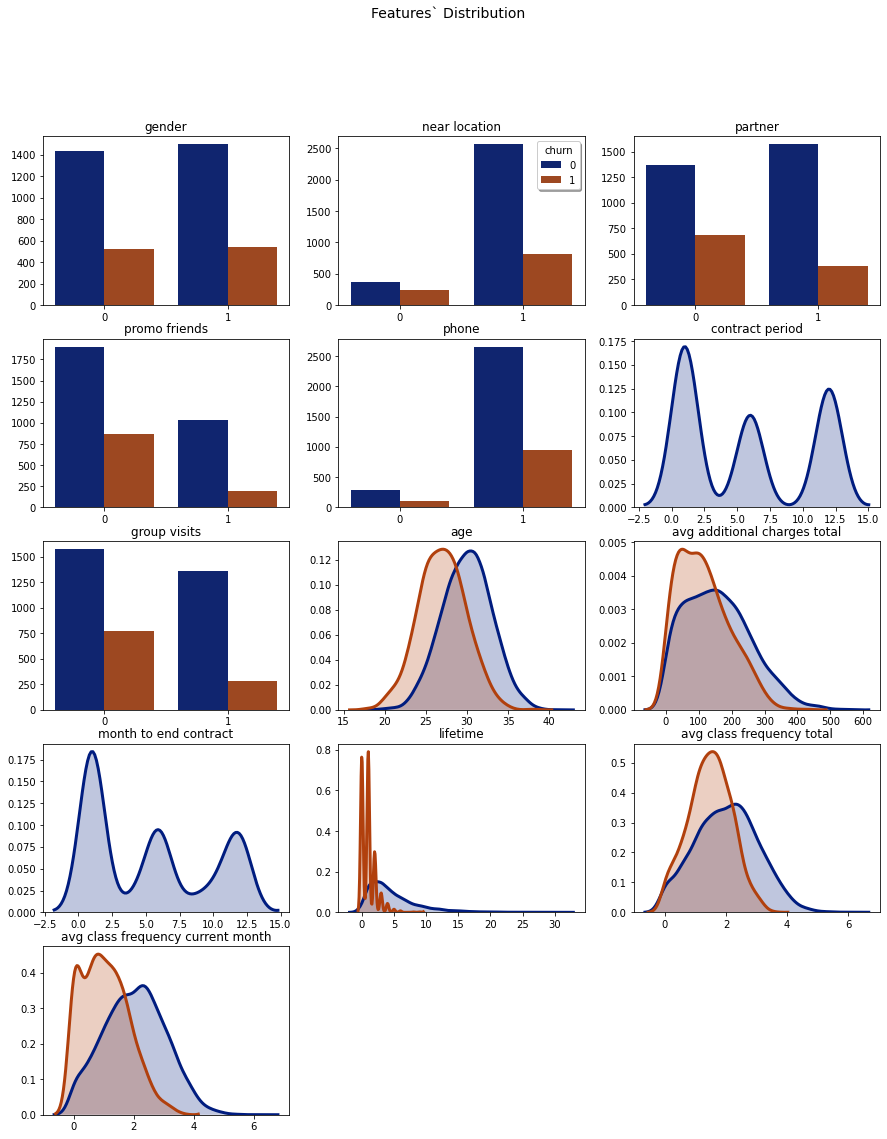

In [20]:
sns.set_palette('dark')
plt.figure(figsize=(15,18))
the_grid = GridSpec(5, 3)
for i,column in enumerate(df.drop('churn', axis=1).columns):
    plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
    if df[column].unique().sum() == 1:
        sns.countplot(x=column, hue='churn', data=df)
        plt.xlabel('')
        plt.ylabel('')
        plt.gca().get_legend().remove()
        if column == 'near_location':
            legend = df['churn'].unique()
            plt.legend(legend, shadow=True, fancybox=True, title='churn', loc='best')
    if df[column].unique().sum() > 1:
        sns.distplot(df[df['churn'] == 0][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        sns.distplot(df[df['churn'] == 1][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        plt.xlabel('')
        plt.ylabel('')

plt.suptitle('Features` Distribution', fontsize = 14)
#plt.tight_layout()
plt.show() 

The graphs confirm our findings after the previous code. The good news here that there are no outliers that we should delete!  And distributions are more or less normal.<br>
On the graphs it is also striking that all the clients who stopped attending the gym were newcomers - this seems to be the biggest difference.

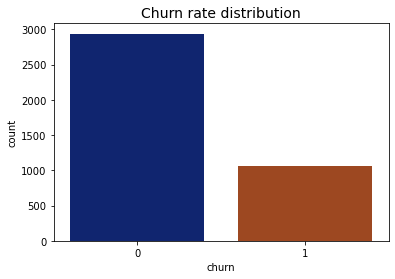

In [21]:
# plotting barplot for churn rate column
ax=sns.countplot(x='churn', data=df)
ax.set_title('Churn rate distribution', fontsize = 14);

We see that the share of those who left is 3 times less than those who continue to be gym's clients. 

<a id='Correlation-matrix'></a>

#### "Build a correlation matrix and display it"

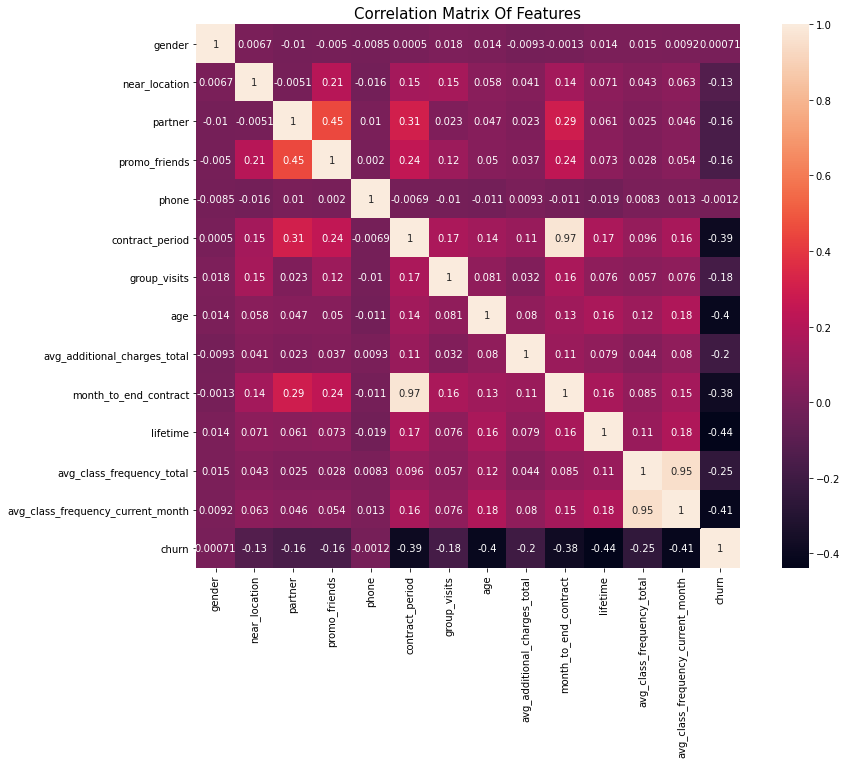

In [22]:
# calculating correlation matrix
cm = df.corr() 

plt.figure(figsize=(15,10))
# plotting an annotated heatmap for the correlation matrix
ax = sns.heatmap(cm, annot = True, square=True) 
ax.set_title('Correlation Matrix Of Features', fontsize=15)
plt.show()

When looking on correlation map we want to answer 2 questions:
1) The features that have the strongest correlation with the target variable? - We don't have them: none with a correlation of at least 0.5.<br>
2) The features that strongly correlate with each other? - We have two pairs with strong correlation: `avg_class_frequency_total` + `avg_class_frequency_current_month` = 0.95 and `contract_period` + `month_to_end_contract` = 0.97.<br>
We remember that mutual correlation is undesirable with linear models, but we cannot know for sure which thing affects what and whether two parameters are influenced by each other directly or through another parameter in the model. So we've tried to drop 2 columns, but it makes all models worse and all metrics fall. May be in this case we are faced with "trading accuracy for a shorter equation" paradox. Thus we leave all the features to keep the models at their best.

<a id='Divide-the-data'></a>

#### "Build a binary classification model for customers where the target feature is the user's leaving next month. Divide the data into train and validation sets using the train_test_split() function"

In [23]:
# dividing the data into features (the X matrix) and a target variable (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# dividing the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

We chose a classic 80/20 split. Since the labels of the target variable are not balanced, it is important to keep them in proportion in the training and test samples. To do this, stratification splitting is used. This keeps the proportionality in the subsamples, and the model will validate more correctly.

<a id='Two-methods'></a>

#### "Train the model on the train set with two methods: logistic regression and random forest"

In [24]:
# we want to standardize the data 
# training StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

# transforming train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [25]:
# defining the model's algorithm 
lr_model = LogisticRegression() 

# training the model
lr_model.fit(X_train, y_train)

# using the trained model to make forecasts
lr_predictions = lr_model.predict(X_test) 
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

In [26]:
# define the algorithm for the random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 

# training the random forest model
rf_model.fit(X_train_st, y_train)

# using the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [27]:
# define the algorithm for the gradient boosting model
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:,1]

We also take gradient boosting model model into account, so we can compare all binary classification models (besides Decision Tree, we won't consider it, because its steroid brother gradient boosting model shows better results).

<a id='Metrics'></a>

#### "Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?"

In [28]:
# defining the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tBalanced accuracy: {:.2f}'.format(balanced_accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

# printing all metrics for logistic regression
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')
# printing all metrics for random forest
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')
# printing all metrics for gradient boosting
print_all_metrics(y_test, gb_predictions, gb_probabilities, title = 'Metrics for gradient boosting:')

Metrics for logistic regression:
	Accuracy: 0.92
	Balanced accuracy: 0.88
	Precision: 0.87
	Recall: 0.80
	F1: 0.84
	ROC_AUC: 0.97
Metrics for random forest:
	Accuracy: 0.92
	Balanced accuracy: 0.89
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97
Metrics for gradient boosting:
	Accuracy: 0.94
	Balanced accuracy: 0.91
	Precision: 0.92
	Recall: 0.84
	F1: 0.88
	ROC_AUC: 0.98


Here we as well in addition to the required metrics: accuracy, precision, and recall we also took into account harmonizing F1 score(that takes into account the balance between the metrics) and Area Under Curve and Receiver Operating Characteristic to evaluate the quality of a classifier. And we can see that we didn't make a mistake when trained also gradient boosting model - it shows the best resultes. Random forest is the worst among all models, but we must admit that they are all good.

<a id='Standardize-the-data'></a>

#### "Standardize the data"

In [29]:
# creating a scaler class object (normalizer)
X = df.drop('churn', axis = 1)
sc = StandardScaler()
X_sc = sc.fit_transform(X)

We have completed obligatory standardization of data before passing it to the algorithm.

<a id='Build-a-matrix-of-distances'></a>

#### "Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Use the resulting graph to estimate the number of clusters you can single out" 

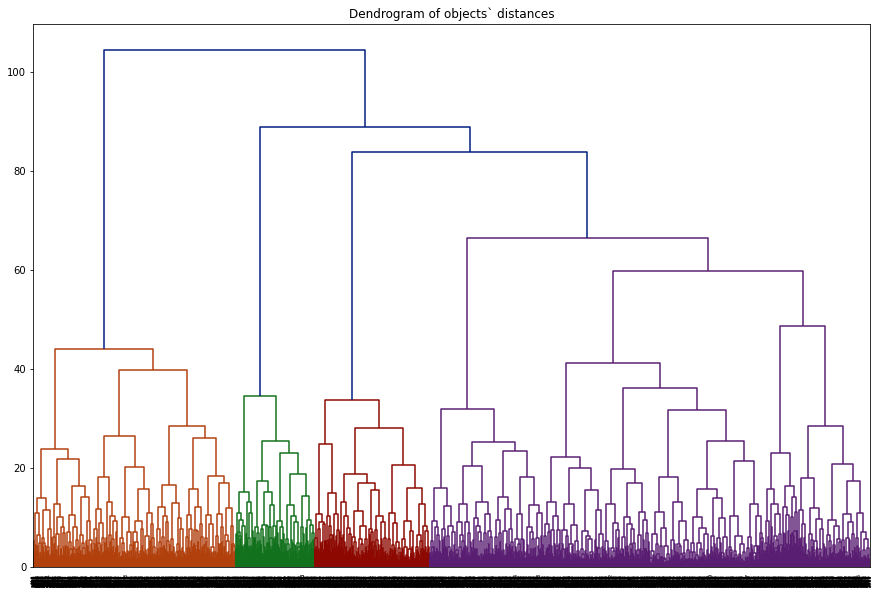

In [30]:
# putting the table with the linked bundles of objects to variable linked
linked = linkage(X_sc, method = 'ward') 
# plotting a dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Dendrogram of objects` distances')
plt.show()

On the dendrogram we clearly see that we have 4 clusters but we are asked to use 5 in order to "easier comparison our results with those of other students". Ok, then let it be 5)

<a id='K-means-algorithm'></a>

#### "Train the clustering model with the K-means algorithm and predict customer clusters (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students)"

In [31]:
# setting the number of clusters as 5
km = KMeans(n_clusters = 5, random_state=0) 
 # applying the algorithm to the data and forming a cluster vector 
labels = km.fit_predict(X_sc)
# storing cluster labels into the field of our dataset
df['cluster_km'] = labels

We applied K-means algorithm to our data, let's look at clusters.

<a id='Mean-feature-values2'></a>

#### "Look at the mean feature values for clusters. Does anything catch your eye?"

In [32]:
# print the statistics of the mean feature values per cluster
df.groupby(['cluster_km']).mean().reset_index()

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,1,0.480787,0.812559,0.000000,0.086223,1.000000,1.866917,0.325211,28.145267,131.369042,1.791003,2.345829,1.325865,1.086883,0.550141
2,2,0.559567,0.858002,0.338147,0.197353,0.998797,2.730445,0.448857,30.196149,164.579011,2.519856,5.010830,2.928140,2.934140,0.048135
3,3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


In the table with average values, we can see that each cluster has distinctive features. 
- Zero cluster has highest mean values in partner, promo_friends and contract_period columns respectively the lowest churn rate. 
- 1st class didn't leave telephone number. 
- 2nd cluster lives not near the gym. 
- 3th cluster has newbies with the shortest contruct time period and the highest churn rate. 
- 4th cluster is engaged in the gym almost two times more often than others.

<a id='Distributions-of-features'></a>

#### "Plot distributions of features for the clusters. Do you notice anything?"

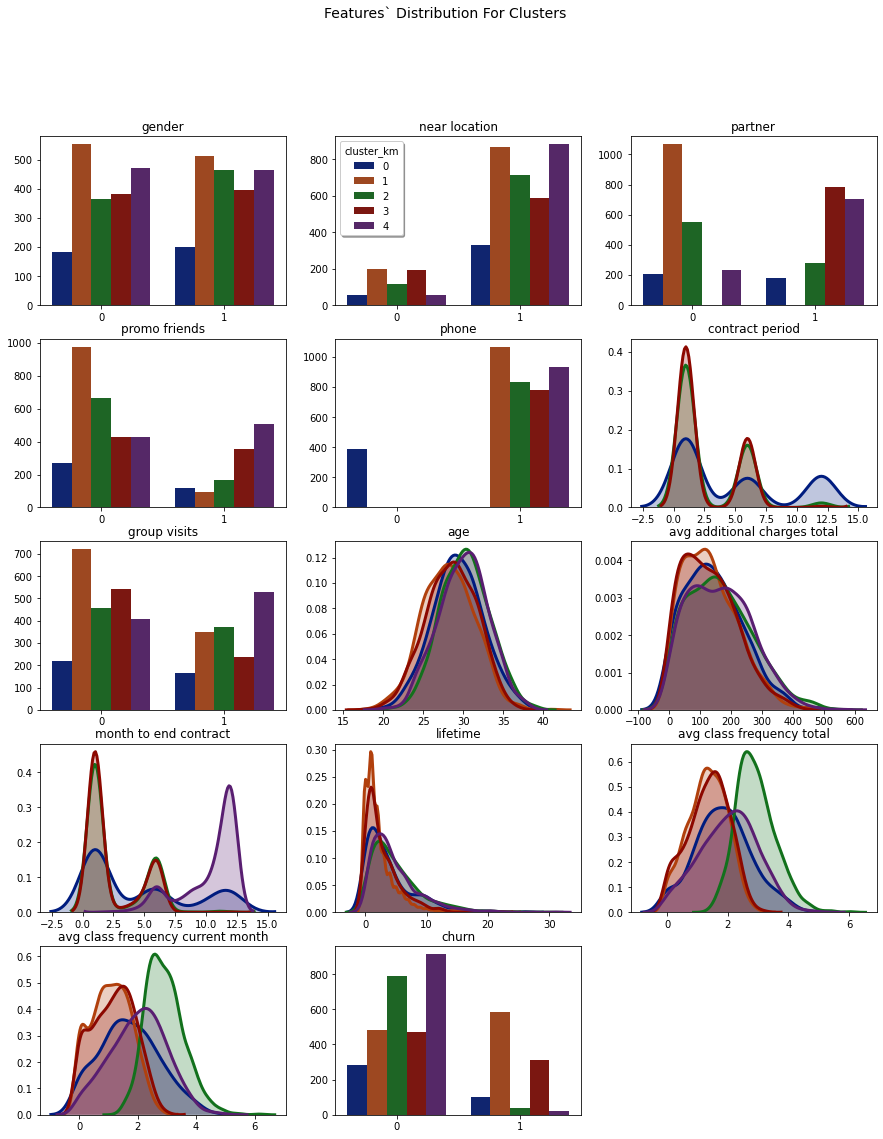

In [33]:
sns.set_palette('dark')
plt.figure(figsize=(15,18))
the_grid = GridSpec(5, 3)
for i,column in enumerate(df.drop('cluster_km', axis=1).columns):
    plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
    if df[column].unique().sum() == 1:
        sns.countplot(x=column, hue='cluster_km', data=df)
        plt.xlabel('')
        plt.ylabel('')
        plt.gca().get_legend().remove()
        if column == 'near_location':
            legend = sorted(df['cluster_km'].unique())
            plt.legend(legend, shadow=True, fancybox=True, title='cluster_km', loc='best')
           
    if df[column].unique().sum() > 1:
        sns.distplot(df[df['cluster_km'] == 0][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        sns.distplot(df[df['cluster_km'] == 1][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        sns.distplot(df[df['cluster_km'] == 2][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        sns.distplot(df[df['cluster_km'] == 3][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        sns.distplot(df[df['cluster_km'] == 4][column], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
        plt.xlabel('')
        plt.ylabel('')

plt.suptitle('Features` Distribution For Clusters', fontsize = 14)
#plt.tight_layout()
plt.show() 

Now we have visualized the results obtained in the previous table. What catch the eye more:
- 'gender', 'age', 'avg_additional_charges_total' features look pretty much the same for all clusters;
- 3d cluster with the highest churn rate on average less visited gym, less often came from friends or through an affiliate program, less visit group sessions;
- 0 cluster with the lowest churn rate has the highest index in feature 'employee of a partner company' and 'promo friends', has long term contract, more often takes part in group sessions.

<a id='Churn-rate-for-each-cluster'></a>

#### "Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?"

In [34]:
((df.groupby(['cluster_km'])['churn'].mean()*100).round(2).astype(str)+'%').reset_index()

,cluster_km,churn
0,0,26.75%
1,1,55.01%
2,2,4.81%
3,3,39.56%
4,4,2.35%


As we saw before the 3d cluster is prone to leaving more than others with 51% of churn rate. And 0 cluster is the most loyal to our buisiness.<br>
Although we weren't asked we want to evaluate the quality of K-means algorithm. So we'll check it with silhouette score.

In [35]:
# calculate the silhouette score for the clustering
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.12


It turned out to be relatively low, which indicates that our clusters are not clearly distinguished groups.

<a id='Conclusion'></a>

#### "Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention"

The main goal of our analysis was to analyze data of customer profiles from Model Fitness gym and come up with a customer retention strategy.<br>
We traind ML models to predict the probability of churn (for the upcoming month) for each customer and choose the one with the best metrics - gradient boosting.<br>
We drew up typical user portraits: the one who is prone to quit and the most loyal. <br>
> - customers who belong to the group with the highest churn rate on average less visit gym, less often come from friends or through the partners' program, less visit group sessions, are mostly newcomers with the short time contruct period.<br>
- the most loyal customers on the contrary are often employees of the partner companies and signed up through a "bring a friend" offer, have long-term contract, more often take part in group sessions.<br>

Based on these facts, our recommendations on customer interaction and retention are:
> - increase the number of gym' partners companies,
- stimulate the interest of existing clients to bring their friends,
- make an attractive offer for newbies to conclude a long-term contracts,
- involve newcomers (as well as existing clients) in group activities, it's more fun together :)